# Happy or Sad Face Image Classifier Model #

In this upcoming project, our goal is to create a deep learning image classifier model to determine whether a given face image depicts a happy or sad expression.

To accomplish this, we will leverage `TensorFlow` along with additional libraries such as `cv2`, `os`, `matplotlib`, and more.

## Import Libraries ##

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def PRINT(text) -> None: print(f"{80*'-'}\n{text}\n{80*'-'}")

In [3]:
!nvidia-smi

Sat Dec 23 07:48:02 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Clone GitHub Repository ##

To access all of our data, including images and their labels, we will clone our GitHub repository.

We can execute this command after finishing the preprocessing of our images in the *Jupyter Lab* environment. Once we have completed building our deep learning model, we will transition to the *Google Colab* environment to train our model on the `GPU` instead of the computer's `CPU`.

In [7]:
!git clone https://github.com/Gavision97/Computer-Vision.git

Cloning into 'Computer-Vision'...
remote: Enumerating objects: 21573, done.
remote: Counting objects: 100% (1085/1085), done.
remote: Compressing objects: 100% (1053/1053), done.
remote: Total 21573 (delta 28), reused 1083 (delta 26), pack-reused 20488
Receiving objects: 100% (21573/21573), 883.04 MiB | 33.39 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (21160/21160), done.
Error downloading object: Object Detection Projects/Facial Verification Project/_siamese_model_.h5 (a59b72d): Smudge error: Error downloading Object Detection Projects/Facial Verification Project/_siamese_model_.h5 (a59b72df08135b6d5cdbfe1516e585e2f9b2e1b6de56acf11c31f5fb02d8cf67): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/Computer-Vision/.git/lfs/logs/20231223T075102.236865717.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-p

In [8]:
cd "/content/Computer-Vision/Image Classification Projects/Happy or Sad Face Image Classifier"

/content/Computer-Vision/Image Classification Projects/Happy or Sad Face Image Classifier


## Get Data ##

The first step is to get data. Our data is going to be taked from websites like *Google*. One simple way is just to search for happy/sad people pictures.

Next we can use *Download All Images* extension which can be downloaded easily from the extenstion. That extension makes the process of downloading images from google much easier.

## Remove Redundant File ##

The next step is to remove redundant file, i.e., file which not one of the images format files (.jpg , .png ...).

We saw that there are lots of *.svg* files. In order to remove those files we will run the command : `rm *.svg` from the command line which was opened from the wanted directory (*happy* or *sad* directory)

## Remove Small Images ##

The next step is to remove all of the images that are of the size lower that 9kb. The way we are going to achive that is by running the commad:

`Get-ChildItem | Where-Object { $_.Length -lt 9216 } | Remove-Item`

from the command line which was opened again from the wanted directory.

In [ ]:
data_dir = 'data'

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print(e)
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\happy-home.jpg
Image not in ext list data\sad\182c9f72579b4bc6a5f2da710cba7918.webp
Image not in ext list data\sad\713b3140ec884011bac5813ea28d0f24.webp
Image not in ext list data\sad\close-sad-female-human-face-footage-147131792_prevstill.jpeg
Image not in ext list data\sad\depositphotos_218926250-stock-photo-human-face-can-different-strong.jpg
Image not in ext list data\sad\depositphotos_2444604-stock-photo-very-sad-little-boy.jpg
Image not in ext list data\sad\fddbda04f5304f4ba58e2cde8311dd54.webp


## Load Data ##

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 452 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

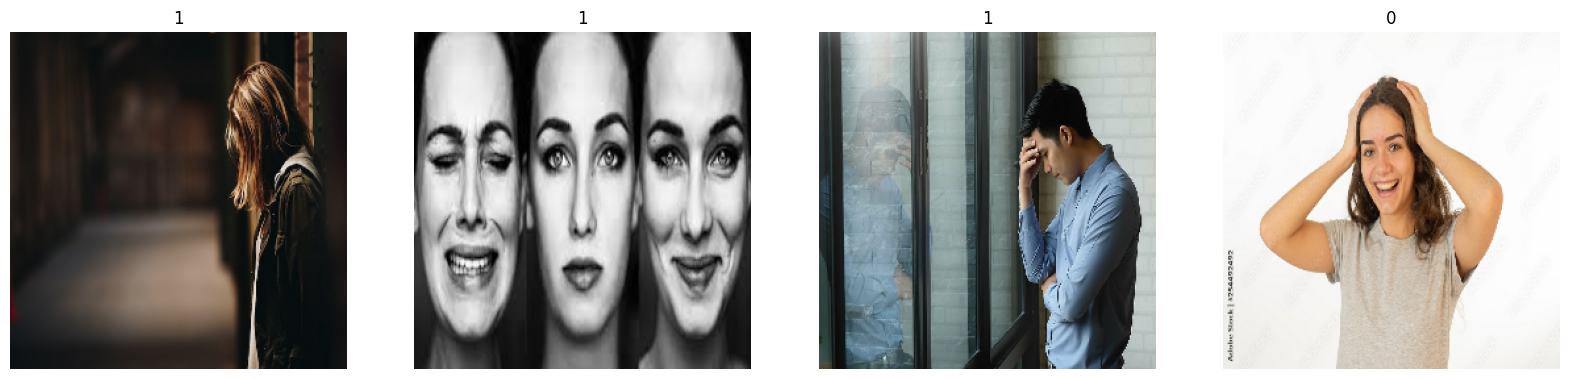

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].axis(False)

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
for indx,val in enumerate(batch):
    if indx == 2 :
        break
    PRINT(f'Image number {indx+1} from the first bach in tensor representation: {batch[0][indx]}\n\n And the corresponding class: {batch[1][indx]}')

--------------------------------------------------------------------------------
Image number 1 from the first bach in tensor representation: [[[227.       172.        46.      ]
  [228.14062  174.14062   48.140625]
  [230.9336   179.9336    51.933594]
  ...
  [253.       253.       253.      ]
  [253.       253.       253.      ]
  [253.       253.       253.      ]]

 [[227.69922  170.21484   45.04297 ]
  [227.44922  172.6211    46.621094]
  [228.04297  174.21484   47.871094]
  ...
  [253.       253.       253.      ]
  [253.       253.       253.      ]
  [253.       253.       253.      ]]

 [[228.01172  170.01172   45.01172 ]
  [227.75     172.75      46.75    ]
  [227.95312  172.95312   46.953125]
  ...
  [254.       254.       254.      ]
  [253.04688  253.04688  253.04688 ]
  [254.       254.       254.      ]]

 ...

 [[250.04688  171.04688   26.046875]
  [250.       172.        22.      ]
  [247.       172.        18.      ]
  ...
  [246.       175.        59.5     ]
  [248. 

## Preprocess Data ##

In order to improve our model efficiency, we will take few data preprocessing steps such as:

- Scale out Date: Scale the images from [0,255] -> [0.1]

After we finish preprocess the data, we can visualize four images and their corresponding from single batch.

Our labels are:

- 0 -> Happy
- 1 -> Sad

In [18]:
data = data.map(lambda x,y: (x/255,y)) # x for images and y for labels, i.e, 0 haapy 1 sad

In [21]:
scaled_itr = data.as_numpy_iterator()

scaled_batch = scaled_itr.next()

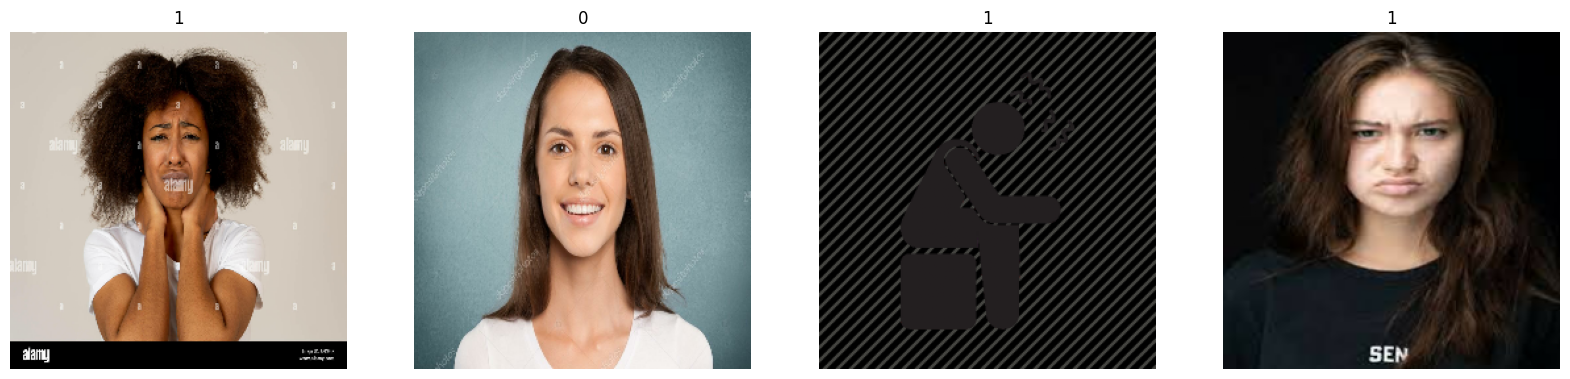

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])
    ax[idx].axis(False)

In [23]:
scaled_batch[0].max(), scaled_batch[0].min()

(1.0, 0.0)

### Split Data ###

Following that, we can partition our data into training, validation, and test sets.

In [25]:
# The size of train dataset
train_size = int(len(data)*.7)

# The size of validation dataset
val_size = int(len(data)*.2)

# The size of test dataset
test_size = int(len(data)*.1)

train_size, val_size, test_size

(10, 3, 1)

In [34]:
# Define train dataset
train = data.take(train_size)

# Define validation dataset
val = data.skip(train_size).take(val_size)

# Define test dataset
test= data.skip(train_size + val_size).take(test_size)

## Building our Deep Learning Model ##

### Import Libraries ###

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

### Building Model Class ###

The subsequent step involves constructing our image classifier model.

In [71]:
class ImageClassifierModel:
    def __init__(self, input_shape=(256, 256, 3)):
        self.__model = self.build_model(input_shape)

    def build_model(self, input_shape):
        model = Sequential()

        model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
        model.add(MaxPooling2D())

        model.add(Conv2D(64, (3, 3), 1, activation='relu'))
        model.add(MaxPooling2D())

        model.add(Conv2D(128, (3, 3), 1, activation='relu'))
        model.add(MaxPooling2D())

        model.add(Flatten())

        model.add(Dense(256, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        return model

    def compile_model(self):
        self.__model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    def get_model(self):
      return self.__model

    def summerize_model(self):
        self.__model.summary()

In [72]:
classifier = ImageClassifierModel()
classifier.compile_model()

In [73]:
classifier.summerize_model()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 30, 30, 128)      

In [75]:
model = classifier.get_model()

model

In [76]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


### Train our Model ###

Once we have created our model class and generated instance of it, as well as compiled the model, we are now ready to proceed with training the model.

In [77]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
10/10 [==============================] - 11s 762ms/step - loss: 2.3213 - accuracy: 0.5250 - val_loss: 0.6633 - val_accuracy: 0.5938
Epoch 2/20
10/10 [==============================] - 8s 688ms/step - loss: 0.6642 - accuracy: 0.5875 - val_loss: 0.6053 - val_accuracy: 0.6354
Epoch 3/20
10/10 [==============================] - 9s 670ms/step - loss: 0.6137 - accuracy: 0.6844 - val_loss: 0.5822 - val_accuracy: 0.6979
Epoch 4/20
10/10 [==============================] - 9s 822ms/step - loss: 0.5627 - accuracy: 0.7219 - val_loss: 0.5331 - val_accuracy: 0.6979
Epoch 5/20
10/10 [==============================] - 8s 666ms/step - loss: 0.4880 - accuracy: 0.7781 - val_loss: 0.4188 - val_accuracy: 0.8438
Epoch 6/20
10/10 [==============================] - 11s 812ms/step - loss: 0.4222 - accuracy: 0.8156 - val_loss: 0.4044 - val_accuracy: 0.7604
Epoch 7/20
10/10 [==============================] - 9s 800ms/step - loss: 0.4021 - accuracy: 0.8469 - val_loss: 0.3837 - val_accuracy: 0.8333
Epoc

## Visualize Training Preformance ##

### Visualize Training Loss ###

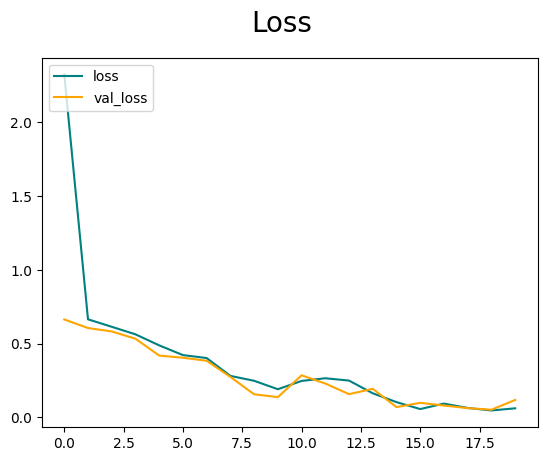

In [78]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)

plt.legend(loc="upper left")

plt.show()

### Visualize Training Accuracy ###

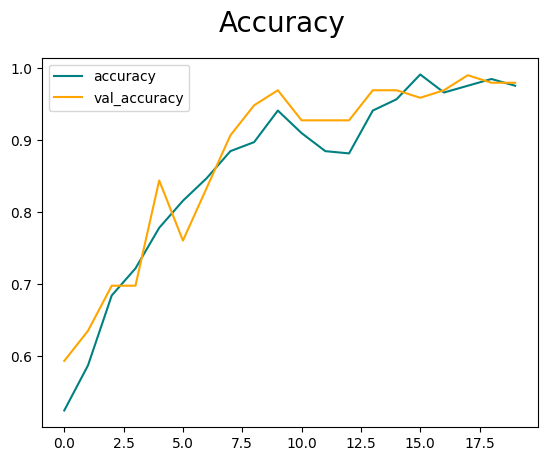

In [79]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)

plt.legend(loc="upper left")

plt.show()

## Evaluate Model ##

In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [82]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [83]:
metrics_list = [precision, recall, accuracy]

In [85]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)

  for metric in metrics_list:
    metric.update_state(y, yhat)

1/1 [==============================] - 0s 41ms/step


### Visualize Metrics Results ###

In [87]:
PRINT(f'Precision result -> {precision.result()}\nRecall result -> {recall.result()}\nAccuracy result -> {accuracy.result()}')

--------------------------------------------------------------------------------
Precision result -> 1.0
Recall result -> 0.9333333373069763
Accuracy result -> 0.96875
--------------------------------------------------------------------------------


## Test our Model ##

Once our model has been trained, we aim to evaluate its performance on new, unseen data.

To achieve this, we will undertake several steps, including downloading random facial expression images (both happy and sad), preprocessing these images, predicting their labels, and plotting the images alongside their predicted labels.

This process allows us to visualize and assess the performance of our trained model.

In [88]:
import cv2

### Upload Random Happy and Sad Face Images ###

The next step is to upload images depicting happy and sad facial expressions of humans.

Afterward, we will preprocess these images to facilitate real-time predictions.

In [93]:
from google.colab import files

uploaded = files.upload()

Saving sad_woman_1.jpg to sad_woman_1.jpg


### Preprocess Images ###

After selecting four images (two happy and two sad), we will proceed to preprocess them.

As part of the preprocessing step, we will:

- Resize the images to 256x256 pixels.
- Convert the color channels from RGB (red, green, and blue) to BGR (blue, green, and red) so that we can visualize the images and their corresponding predicted labels using the `matplotlib` library later on.

In [127]:
happy_woman_1_img = cv2.imread('happy_woman_1.jpg')
happy_woman_2_img = cv2.imread('happy_woman_2jpg.jpg')
sad_woman_1_img = cv2.imread('sad_woman_1.jpg')
sad_man_1_img = cv2.imread('sad_man_1.jpg')

In [128]:
test_images_list = [happy_woman_1_img, happy_woman_2_img, sad_woman_1_img, sad_man_1_img]

#### Preprocess Step ####

In [133]:
resized_test_images_list = []

for img_path in test_images_list:

    # Resize the images to 256x256
    resized = tf.image.resize(img_path, (256, 256))

    # Switch the color channels, so we can later visualize the images.
    adjusted_img = resized[..., ::-1]

    # Append the adjusted image to 'resized_test_images_list
    resized_test_images_list.append(adjusted_img)

#### Visualization Step ####

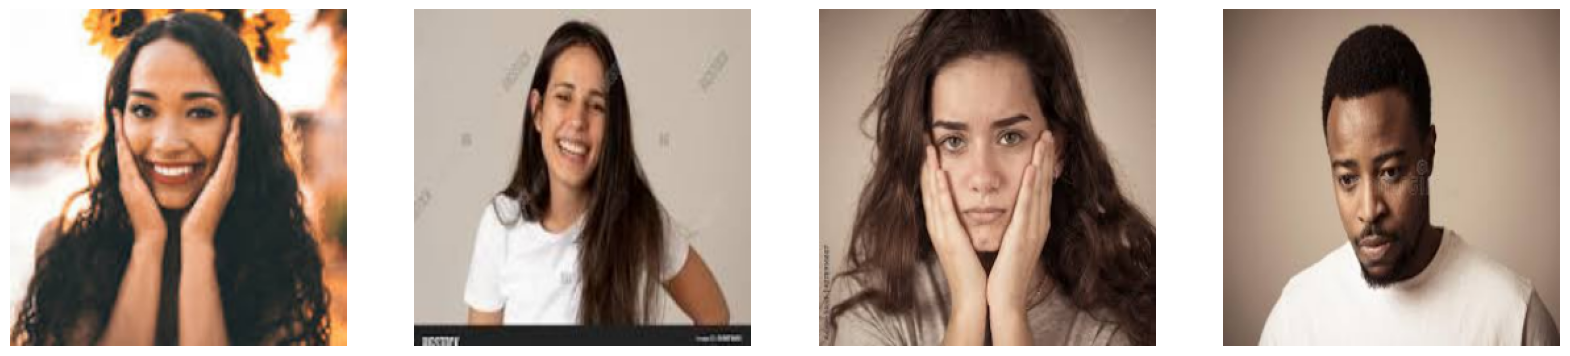

In [134]:
fig, axes = plt.subplots(1, len(resized_test_images_list), figsize=(20, 20))

for idx, img in enumerate(resized_test_images_list):
    axes[idx].imshow(img.numpy().astype(int))  # Convert to int for proper display
    axes[idx].axis('off')

plt.show()

As observed in the image visualization, we currently lack labels for each image. This is because we have not yet predicted their labels using our trained model.

However, we can still discern them by ourselves simply by examining the facial expressions in the images above.

### Generate Predictions ###

After completing the preprocessing step, we can utilize our model to predict the labels of images.

Subsequently, we will visualize the images along with their predicted labels to assess how well our model performed on new, unseen, randomly selected facial expressions of happy and sad individuals.

In [136]:
images_predictions_list = []

In [137]:
for img in resized_test_images_list:
  yhat = model.predict(np.expand_dims(img/255, 0))

  images_predictions_list.append(yhat)

1/1 [==============================] - 0s 19ms/step


In [138]:
def print_prediction_value_and_visualize(img, pred) -> None:
  if pred == None:
    PRINT("Error! Got None value!")
    return

  if pred > 0.5:
    PRINT(f'Predicted class is  -> Sad')
  else:
    PRINT(f'Predicted class is -> Happy')

  plt.imshow(img.numpy().astype(int))
  plt.axis(False)

  plt.show()

--------------------------------------------------------------------------------
Predicted class is -> Happy
--------------------------------------------------------------------------------


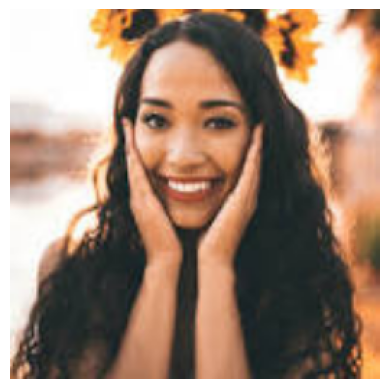

In [150]:
print_prediction_value_and_visualize(resized_test_images_list[0],images_predictions_list[0])

--------------------------------------------------------------------------------
Predicted class is -> Happy
--------------------------------------------------------------------------------


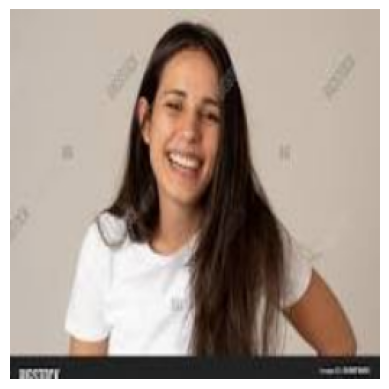

In [149]:
print_prediction_value_and_visualize(resized_test_images_list[1],images_predictions_list[1])

--------------------------------------------------------------------------------
Predicted class is  -> Sad
--------------------------------------------------------------------------------


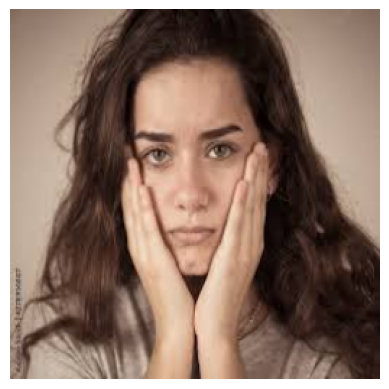

In [148]:
print_prediction_value_and_visualize(resized_test_images_list[2],images_predictions_list[2])

--------------------------------------------------------------------------------
Predicted class is  -> Sad
--------------------------------------------------------------------------------


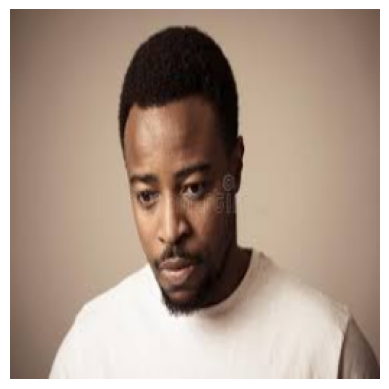

In [147]:
print_prediction_value_and_visualize(resized_test_images_list[3],images_predictions_list[3])

As observed in our real-time test, we randomly selected four facial expression images that our model had not encountered before, and we accurately predicted each expression. The model correctly identified sad faces as sad and happy faces as happy.

## Save Trained Model ##

In [153]:
model.save('happy_sad_image_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
